In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Datasets origin from kaggle, check out [here](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews).

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

In [51]:
dataset_name = "./Womens Clothing E-Commerce Reviews.csv"
cols = pd.read_csv(dataset_name, nrows=1).columns
reviews_df = pd.read_csv(dataset_name, usecols=cols[1:])
cols = [col.lower() for col in reviews_df.columns]
reviews_df.columns = cols
reviews_df.head()

,clothing id,age,title,review text,rating,recommended ind,positive feedback count,division name,department name,class name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [52]:
reviews_df.shape

(23486, 10)

In [53]:
reviews_df.describe()

,clothing id,age,rating,recommended ind,positive feedback count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [54]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   clothing id              23486 non-null  int64 
 1   age                      23486 non-null  int64 
 2   title                    19676 non-null  object
 3   review text              22641 non-null  object
 4   rating                   23486 non-null  int64 
 5   recommended ind          23486 non-null  int64 
 6   positive feedback count  23486 non-null  int64 
 7   division name            23472 non-null  object
 8   department name          23472 non-null  object
 9   class name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [55]:
reviews_df["rating"].value_counts()

rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

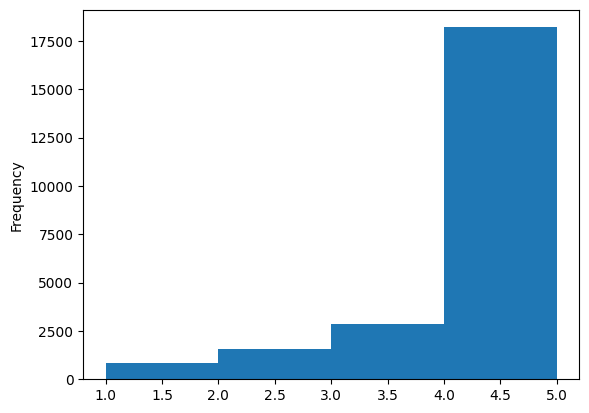

In [56]:
ax = reviews_df["rating"].plot(kind="hist", bins=range(1, 6))
plt.show()

In [57]:
def soft_rating(rating):
    new_rating = 3
    if rating <= 3:
        new_rating = 1
    elif rating <= 4:
        new_rating = 2
    return new_rating


reviews_df["soft_rating"] = reviews_df["rating"].map(soft_rating)
reviews_df.head()

,clothing id,age,title,review text,rating,recommended ind,positive feedback count,division name,department name,class name,soft_rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,2
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,3
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,1
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,3
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,3


In [58]:
reviews_df.shape

(23486, 11)

In [59]:
reviews_df["soft_rating"].value_counts()

soft_rating
3    13131
1     5278
2     5077
Name: count, dtype: int64

In [60]:
numeric_reviews_df = reviews_df.select_dtypes(include="number").drop(
    labels=["clothing id"], axis=1
)
numeric_reviews_df.corr()

,age,rating,recommended ind,positive feedback count,soft_rating
age,1.000000,0.026831,0.030622,0.043079,0.036042
rating,0.026831,1.000000,0.792336,-0.064961,0.941389
recommended ind,0.030622,0.792336,1.000000,-0.069045,0.726893
positive feedback count,0.043079,-0.064961,-0.069045,1.000000,-0.062530
soft_rating,0.036042,0.941389,0.726893,-0.062530,1.000000


From this information it is pretty clear that `positive feedback count` bothers more than helps.
And not only that but it is a feature that doesn't really talk about the user opinion but 
how other interpreted.

In [61]:
reviews_df = reviews_df.drop(labels=["positive feedback count"], axis=1)
reviews_df.shape

(23486, 10)